**Retrieval Augmented Generation Demo- AI-Powered Document Intelligence** *italicized text*

From PDFs to Smart Answers in Minutes!

> Add blockquote


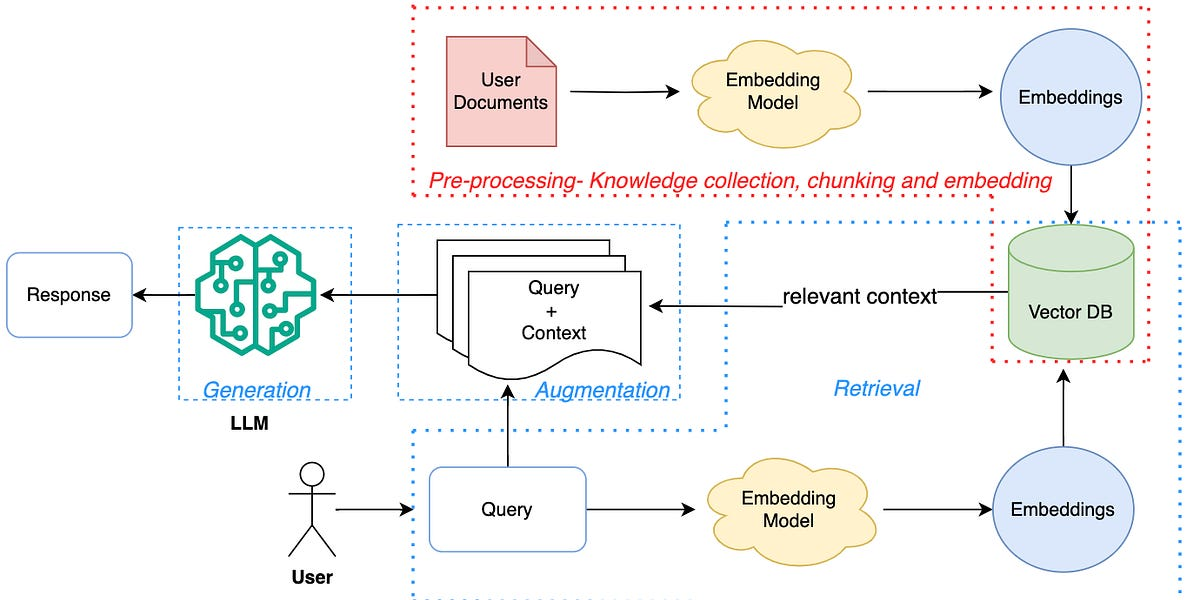

[link text](https://)
📌 STEP 1: Install Dependencies - Building Your AI Toolkit
What's happening here?
This step installs all the necessary AI tools and libraries needed for our document intelligence system. Think of it like gathering all the tools before starting a project.
Key Components:

🤖 AI Models: LangChain, OpenAI, Google AI - The "brains" that understand and generate text
📚 Document Readers: PyPDF2, Unstructured - Convert PDFs and documents into text the AI can process
🔍 Smart Search: FAISS, ChromaDB - Store and quickly find relevant information from documents
🌐 Web Tools: Groq, Requests - Fast AI responses and web scraping capabilities
⚡ Performance: All tools optimized for speed and efficiency in processing large documents

Installation takes 2-3 minutes and only needs to be done once per session

In [1]:
# 📌 STEP 1: Install dependencies
!pip install langchain langchain_community openai google-generativeai faiss-cpu unstructured chromadb PyPDF2 tiktoken huggingface_hub langchain-google-genai langchain-groq requests beautifulsoup4

# For Groq and web scraping
!pip install groq requests beautifulsoup4



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

📌 STEP 2: Import Modules - Loading Our AI Toolkit
What's happening here?
Now that we've installed all the tools, we need to "import" them into our workspace. Think of this like taking tools out of a toolbox and placing them on your workbench - ready to use.
🔗 What is LangChain?
LangChain is like a "universal connector" for AI applications. Imagine trying to connect different brands of electronics - you'd need various adapters and cables. LangChain does this for AI models, making it easy to combine different AI services, databases, and tools into one powerful system.
Key Components:

📁 File Management: google.colab.files - Upload PDFs directly from your computer
🔍 Smart Search Engine: FAISS - Stores and searches through document content instantly
✂️ Text Processor: CharacterTextSplitter - Breaks large documents into manageable chunks
📄 Document Loaders: PyPDFLoader, WebBaseLoader - Read PDFs and web pages
🤖 AI Chain Builder: RetrievalQA, prompt templates - Creates the question-answering system that can retrieve relevant info and generate answers

This step runs instantly and prepares all components for building your AI assistant.

In [2]:
# 📌 STEP 2: Import modules
import os
from google.colab import files
from langchain.vectorstores import FAISS
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import PyPDFLoader, WebBaseLoader
from langchain.prompts import PromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import RetrievalQA
from langchain.schema import Document



📌 STEP 3: Set Your API Keys - Getting Access to AI Models
What's happening here?
API keys are like "digital passwords" that give you access to powerful AI models. Think of them as VIP passes to exclusive AI services - without them, you can't use the AI models.

🔐 Why do we need API keys?
These AI companies (OpenAI, Google, Groq) provide their AI models as paid services. The API key identifies you as a paying customer and tracks your usage, similar to how a membership card works at a gym.

Key Components:

🤖 OpenAI API Key: Access to GPT models (ChatGPT's engine) for understanding and generating text
⚡ Groq API Key: Ultra-fast AI inference - gets responses from AI models in milliseconds
🧠 Gemini API Key: Google's advanced AI model for text understanding and generation
🔒 Secure Storage: Using Google Colab's userdata keeps your keys private and encrypted
💡 Multiple Options: Having 3 different AI services gives flexibility and backup options
You'll need to obtain these API keys from each provider's website and store them in Colab's secrets section.



In [3]:
# 📌 STEP 3: 🔐 Set your API keys
# 🔑 Add your OpenAI API key
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
GROQ_API_KEY=userdata.get("GROQ_API_KEY")
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')



📌 STEP 4: Upload PDF or Load Web Content - Feeding Data to Your AI
What's happening here?
This is where you give your AI system something to read and learn from. Think of it like handing books to a research assistant - the AI will read everything and be ready to answer questions about the content.

📚 Dual Content Sources:
Your AI can learn from both local files and web content, making it incredibly versatile for different use cases.

Key Components:

📁 PDF Upload: files.upload() opens a file picker where you can select any PDF from your computer
📄 PDF Reader: PyPDFLoader extracts all text content from your uploaded PDF document
🌐 Web Scraper: WebBaseLoader can read content directly from any website URL
📊 Content Combination: Both PDF and web content get merged into one knowledge base
🔄 Flexible Input: You can use just PDFs, just web content, or combine both for richer information
Example: Upload a research paper PDF and add a Wikipedia article for comprehensive coverage of a topic.



In [5]:
# 📌 STEP 4: Upload PDF or load web content
uploaded = files.upload()

# Process ALL uploaded PDF files
docs = []
for filename in uploaded.keys():
    print(f"📄 Processing: {filename}")
    loader = PyPDFLoader(filename)
    file_docs = loader.load()
    docs.extend(file_docs)  # Add all pages from this PDF
    print(f"✅ Loaded {len(file_docs)} pages from {filename}")

print(f"📚 Total documents loaded: {len(docs)} pages from {len(uploaded)} PDF files")

# Optional: Add web content
#url = "https://en.wikipedia.org/wiki/Artificial_intelligence"
#web_loader = WebBaseLoader(url)
#docs += web_loader.load()

Saving MCP Guide.pdf to MCP Guide.pdf
Saving Mastering AI Agents.pdf to Mastering AI Agents.pdf
📄 Processing: MCP Guide.pdf
✅ Loaded 74 pages from MCP Guide.pdf
📄 Processing: Mastering AI Agents.pdf
✅ Loaded 93 pages from Mastering AI Agents.pdf
📚 Total documents loaded: 167 pages from 2 PDF files


In [6]:
docs[5]

Document(metadata={'producer': 'macOS Version 15.5 (Build 24F74) Quartz PDFContext', 'creator': 'PyPDF', 'creationdate': "D:20250626122824Z00'00'", 'title': 'MCP book', 'moddate': "D:20250626122824Z00'00'", 'source': 'MCP Guide.pdf', 'total_pages': 74, 'page': 5, 'page_label': '6'}, page_content="DailyDoseofDS.com \nThis is simple, isn't it?  \nThe translator is like an MCP!  \nIt lets you (Agents) talk to other people (tools or other capabilities) through a \nsingle interface.  \nTo formalize, while LLMs possess impressive knowledge and reasoning skills, \nwhich allow them to perform many complex tasks, their knowledge is limited to \ntheir initial training data. \n  \nIf they need to access real-time information, they must use external tools and \nresources on their own.  \nModel context protocol (MCP) is a standardized interface and framework that \nallows AI models to seamlessly interact with external tools, resources, and \nenvironments.  \nMCP acts as a universal connector for AI

In [7]:
# 📌 STEP 5: Split documents into chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
split_docs = text_splitter.split_documents(docs)

In [8]:
split_docs[5]

Document(metadata={'producer': 'macOS Version 15.5 (Build 24F74) Quartz PDFContext', 'creator': 'PyPDF', 'creationdate': "D:20250626122824Z00'00'", 'title': 'MCP book', 'moddate': "D:20250626122824Z00'00'", 'source': 'MCP Guide.pdf', 'total_pages': 74, 'page': 5, 'page_label': '6'}, page_content="DailyDoseofDS.com \nThis is simple, isn't it?  \nThe translator is like an MCP!  \nIt lets you (Agents) talk to other people (tools or other capabilities) through a \nsingle interface.  \nTo formalize, while LLMs possess impressive knowledge and reasoning skills, \nwhich allow them to perform many complex tasks, their knowledge is limited to \ntheir initial training data. \n  \nIf they need to access real-time information, they must use external tools and \nresources on their own.  \nModel context protocol (MCP) is a standardized interface and framework that \nallows AI models to seamlessly interact with external tools, resources, and \nenvironments.  \nMCP acts as a universal connector for AI

📌 STEP 6: Select Model & Embeddings - Choose Your AI Brain
What's happening here?
Here you pick which AI model will answer questions (LLM) and which will understand document meaning (embeddings). It's like choosing between different expert consultants - each has unique strengths.

In [ ]:
# 📌 STEP 6: Select model & embeddings
#llm_choice = "openai"   # Options: "openai", "groq", "gemini"
#embed_choice = "openai" # Options: "openai", "huggingface", "gemini"

In [9]:
llm_choice = "gemini"   # Options: "openai", "groq", "gemini"
embed_choice = "gemini" # Options: "openai", "huggingface", "gemini"

In [ ]:
#llm_choice = "groq"   # Options: "openai", "groq", "gemini"
#embed_choice = "gemini" # Options: "openai", "huggingface", "gemini"

📌 STEP 7: Load Embeddings - Teaching AI to Understand Meaning
What's happening here?
This code loads the chosen embedding model that converts text into mathematical representations. Think of it as teaching the AI to "understand" the meaning of words and sentences, not just read them.
🧠 What are Embeddings?
Imagine you're organizing a library. Instead of sorting books alphabetically, you group them by topics and themes - romance novels together, science books together, etc. Embeddings do this for text by converting words into numbers that capture their meaning. Words with similar meanings get similar numbers.
Process: The selected embedding model (OpenAI, HuggingFace, or Gemini) gets initialized and ready to process your document content into searchable vectors that preserve meaning relationships.

In [10]:
# --- Load Embeddings ---
if embed_choice == "openai":
    from langchain.embeddings import OpenAIEmbeddings
    embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)
elif embed_choice == "huggingface":
    from langchain.embeddings import HuggingFaceEmbeddings
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
elif embed_choice == "gemini":
    from langchain_google_genai import GoogleGenerativeAIEmbeddings
    embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GEMINI_API_KEY)

📌 STEP 8: Create Vectorstore and Retriever - Building Your AI's Memory System
What's happening here?
This creates a smart search engine for your documents. FAISS stores all document chunks as vectors (numerical representations), and the retriever finds the 3 most relevant pieces when you ask a question.
Process: Your documents get converted into a searchable database where the AI can instantly find relevant information based on meaning similarity, not just keyword matching.

In [11]:
# 📌 STEP 8: Create vectorstore and retriever
vectorstore = FAISS.from_documents(split_docs, embeddings)
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

📌 STEP 9: Load LLM - Initializing Your AI Assistant
What's happening here?
This loads the chosen language model (LLM) that will actually read the retrieved documents and generate human-like answers to your questions. Think of it as hiring the "spokesperson" who takes information and explains it clearly.
Current Setup: Loading the selected AI model (OpenAI's GPT, Groq's Llama, or Google's Gemini) with temperature=0.7 for balanced creativity and accuracy in responses.

In [12]:
# 📌 STEP 9: Load LLM
if llm_choice == "openai":
    from langchain.chat_models import ChatOpenAI
    llm = ChatOpenAI(model="gpt-4", temperature=0.7,openai_api_key=OPENAI_API_KEY)
elif llm_choice == "groq":
    from langchain_groq import ChatGroq
    llm = ChatGroq(model_name="llama3-8b-8192", temperature=0.7,api_key=GROQ_API_KEY)
elif llm_choice == "gemini":
    from langchain_google_genai import ChatGoogleGenerativeAI
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.7,google_api_key=GEMINI_API_KEY)


📌 STEP 10: Define Custom Prompt - Setting AI Boundaries
What's happening here?
This creates specific instructions for the AI, telling it to ONLY use information from your uploaded documents when answering questions. It's like giving a research assistant strict guidelines to stick to the provided materials and not make things up.
Key Feature: The AI will honestly say "I don't know" if the answer isn't in your documents, preventing hallucinations and ensuring trustworthy responses based solely on your content.

In [13]:
  # 📌 STEP 10: Define a custom prompt to restrict responses


from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.prompts import PromptTemplate
from langchain.schema.runnable import RunnableMap

# 🧠 Define a prompt template that expects 'context' and 'question'
prompt_template = """You are a helpful assistant. Use ONLY the context below to answer the question.
If the answer is not in the context, respond with exactly:
"KNOWLEDGE_BASE_INSUFFICIENT: I cannot answer this question as the information is not available in the provided documents."

Context:
{context}

Question: {question}
Answer:"""
# 🔧 Create the prompt with input variables 'context' and 'question'
prompt = PromptTemplate(
    template=prompt_template,
    input_variables=["context", "question"]
)


📌 STEP 11: Create QA Chain - Assembling Your AI System
What's happening here?
This connects all the pieces together into one working system: the document retriever finds relevant content, the custom prompt guides the AI's behavior, and the language model generates the final answer.
Final Assembly: Creates a complete question-answering pipeline that retrieves relevant document chunks, applies your custom prompt template, and returns both the AI's answer and the source documents used.

In [14]:
# 📌 STEP 11: Create QA chain
from langchain.chains import RetrievalQA

# Create the RetrievalQA chain properly
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    chain_type_kwargs={"prompt": prompt},
    return_source_documents=True
)

print("🔧 QA chain created successfully")


🔧 QA chain created successfully


📌 STEP 11: Interactive Q&A Loop - Your AI Assistant is Live!
What's happening here?
This creates a user-friendly chat interface where you can ask questions about your documents. The system handles greetings, provides helpful commands, and gives detailed answers with source references.
Features: Smart greeting detection, document statistics, error handling, and shows which parts of your document were used to answer each question - making it transparent and trustworthy.

In [15]:
# 📌 STEP 12: Interactive Q&A loop with greeting handling
print("✅ Secure RAG System Ready! Ask me anything from the uploaded content.")
print("Type 'exit' to quit, 'help' for commands")

# Define common greetings and responses
greetings = {
    'hi': "Hello! I'm ready to help you with questions about your uploaded document. What would you like to know?",
    'hello': "Hi there! I have access to your uploaded document and I'm ready to answer your questions about it.",
    'hey': "Hey! Feel free to ask me anything about the content you've uploaded.",
    'good morning': "Good morning! I'm here to help you explore your document. What can I assist you with?",
    'good afternoon': "Good afternoon! Ready to answer questions about your uploaded content.",
    'good evening': "Good evening! How can I help you with your document today?",
    'how are you': "I'm doing great and ready to help! I have your document loaded and can answer questions about it.",
    'thanks': "You're welcome! Feel free to ask more questions about your document.",
    'thank you': "You're very welcome! Is there anything else you'd like to know about your uploaded content?",
    'what can you do': "I can answer questions about the document you've uploaded. I'll search through the content to find relevant information and provide accurate answers based on what's in your document.",
    'who are you': "I'm your document assistant! I've been loaded with your uploaded content and I'm here to help you find information and answer questions about it."
}

def handle_greeting(question):
    """Check if the question is a greeting and return appropriate response"""
    question_lower = question.lower().strip()

    # Direct matches
    if question_lower in greetings:
        return greetings[question_lower]

    # Partial matches
    for greeting, response in greetings.items():
        if greeting in question_lower:
            return response

    return None  # Not a greeting

while True:
    question = input("\n❓ Ask a question: ")

    if question.lower() == 'exit':
        print("👋 Goodbye! Thanks for using the RAG system!")
        break

    if question.lower() == 'help':
        print("""
🔧 Available commands:
- Type any question about your document
- 'exit' - Quit the program
- 'help' - Show this help message
- 'stats' - Show document statistics
- Normal greetings work too: 'hi', 'hello', 'thanks', etc.
        """)
        continue

    if question.lower() == 'stats':
        print(f"""
📊 Document Statistics:
- Total chunks: {len(split_docs)}
- Embedding model: {embed_choice}
- LLM model: {llm_choice}
- Vector store: FAISS
        """)
        continue

    if not question.strip():
        print("⚠️ Please enter a valid question")
        continue

    # Check for greetings first
    greeting_response = handle_greeting(question)
    if greeting_response:
        print(f"💬 {greeting_response}")
        continue

    try:
        print("🔍 Searching for relevant information...")
        response = qa_chain.invoke({"query": question})
        answer = response["result"]
        print(f"\n💬 Answer: {answer}")

        # Simple check using the exact marker from updated prompt
        if not answer.startswith("KNOWLEDGE_BASE_INSUFFICIENT"):
            # Show sources only when AI found relevant information
            if response.get("source_documents"):
                print("\n📚 Sources used:")
                for i, doc in enumerate(response["source_documents"][:2]):
                    source_text = doc.page_content[:150].replace('\n', ' ').strip()
                    print(f"   {i+1}. {source_text}...")
        else:
            print("\n🚫 No relevant sources found in the knowledge base.")

    except Exception as e:
        print(f"❌ Error occurred: {str(e)}")
        if "quota" in str(e).lower() or "limit" in str(e).lower():
            print("💡 API quota exceeded. Try again later or switch to a different model.")
        elif "timeout" in str(e).lower():
            print("💡 Request timed out. Try with a shorter question or switch models.")
        else:
            print("💡 Please try rephrasing your question or check your API keys")

print("🏁 RAG System session ended")

✅ Secure RAG System Ready! Ask me anything from the uploaded content.
Type 'exit' to quit, 'help' for commands

❓ Ask a question: What is MCP?
🔍 Searching for relevant information...

💬 Answer: MCP is like a translator that understands all languages, allowing someone who only knows English to get information from people who speak different languages without having to learn each language.
KNOWLEDGE_BASE_INSUFFICIENT: I cannot answer this question as the information is not available in the provided documents.

📚 Sources used:
   1. DailyDoseofDS.com  What is MCP? Imagine you only know English. To get info from a person who only knows:    ● French, you must learn French.  ● German...
   2. DailyDoseofDS.com  Why was MCP created?  Without MCP, adding a new tool or integrating a new model was a headache.  If you had three AI applications a...

❓ Ask a question: Why was MCP created?
🔍 Searching for relevant information...

💬 Answer: MCP was created because without it, adding a new tool or in